# Aim: To identify the molecular, metallic and solvent features most relevant to binding affinity prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install lightgbm

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
df=pd.read_excel(r'Add Path to the Dataset from the drive')
# df=pd.read_excel(r'/content/drive/MyDrive/Chemistry Thesis/lanthanide series - dataset (practice)(new).xlsx')
df

,Molecule,Isomer,Metal,Power,Medium,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Br,Bromide,Ce,3,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.20
1,Br,Bromide,Eu,3,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.20
2,Br,Bromide,Eu,3,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.21
3,BrO3,Bromate,Eu,3,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,...,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1,0.62
4,BrO3,Bromate,Eu,3,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,SO4,Sulfate,Pm,3,NaClO4,-2,4.062942,86.816358,4.50000,2.041241,...,1.86,1.13,0.979,71.6,2499,122.4,403,328,2.0,1.60
6579,SO4,Sulfate,Ce,3,NaCl,-2,4.062942,86.816358,4.50000,2.041241,...,1.84,1.12,1.034,72.0,2165,58.4,1074,298,1.0,1.57
6580,SO4,Sulfate,Eu,3,NaCl,-2,4.062942,86.816358,4.50000,2.041241,...,1.83,1.20,0.950,77.8,2165,58.4,1074,298,1.0,1.53
6581,SO4,Sulfate,Tb,3,NaCl,-2,4.062942,86.816358,4.50000,2.041241,...,1.81,1.10,0.923,73.3,2165,58.4,1074,298,1.0,1.38


In [6]:
df.head(10)

,Molecule,Isomer,Metal,Power,Medium,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Br,Bromide,Ce,3,NaClO4,-1,0.000000,0.000000,0.000000,0.377964,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.20
1,Br,Bromide,Eu,3,NaClO4,-1,0.000000,0.000000,0.000000,0.377964,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.20
2,Br,Bromide,Eu,3,NaClO4,-1,0.000000,0.000000,0.000000,0.377964,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.21
3,BrO3,Bromate,Eu,3,NaClO4,-1,2.323790,8.000000,3.577350,1.602709,...,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1,0.62
4,BrO3,Bromate,Eu,3,NaClO4,-1,2.323790,8.000000,3.577350,1.602709,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.03
5,BrO3,Bromate,Tb,3,NaClO4,-1,2.323790,8.000000,3.577350,1.602709,...,1.81,1.10,0.923,73.3,2499,122.4,403,293,0.1,0.54
6,C10H10O2,1Phenylbutane13dioneC6H5COCH2COCH3,Ce,3,NaClO4,0,3.575810,631.646695,17.618802,15.816497,...,1.84,1.12,1.034,72.0,2499,122.4,403,293,0.1,6.17
7,C10H10O2,1Phenylbutane13dioneC6H5COCH2COCH3,Eu,3,KNO3,0,3.575810,631.646695,17.618802,15.816497,...,1.83,1.20,0.950,77.8,2109,101.1,607,298,0.1,6.89
8,C10H10O6,12PhenylenedioxodiethanoicacidC6H4OCH2COOH2,Ce,3,NaClO4,0,3.585355,674.746971,20.447229,17.449490,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,0.1,4.16
9,C10H10O6,12PhenylenedioxodiethanoicacidC6H4OCH2COOH2,Eu,3,NaClO4,0,3.585355,674.746971,20.447229,17.449490,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,0.1,4.60


In [7]:
df.shape

(6583, 108)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Columns: 108 entries, Molecule to Log K1
dtypes: float64(86), int64(18), object(4)
memory usage: 5.4+ MB


In [9]:
df.isnull().sum()

Molecule                     0
Isomer                       0
Metal                        0
Power                        0
Medium                       0
                            ..
Molar Mass_medium (g/mol)    0
Melting Point_medium (K)     0
Temperature (K)              0
Concentration (M)            0
Log K1                       0
Length: 108, dtype: int64

In [10]:
df.dropna(inplace=True)
df

,Molecule,Isomer,Metal,Power,Medium,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Br,Bromide,Ce,3,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.20
1,Br,Bromide,Eu,3,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.20
2,Br,Bromide,Eu,3,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.21
3,BrO3,Bromate,Eu,3,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,...,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1,0.62
4,BrO3,Bromate,Eu,3,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,SO4,Sulfate,Pm,3,NaClO4,-2,4.062942,86.816358,4.50000,2.041241,...,1.86,1.13,0.979,71.6,2499,122.4,403,328,2.0,1.60
6579,SO4,Sulfate,Ce,3,NaCl,-2,4.062942,86.816358,4.50000,2.041241,...,1.84,1.12,1.034,72.0,2165,58.4,1074,298,1.0,1.57
6580,SO4,Sulfate,Eu,3,NaCl,-2,4.062942,86.816358,4.50000,2.041241,...,1.83,1.20,0.950,77.8,2165,58.4,1074,298,1.0,1.53
6581,SO4,Sulfate,Tb,3,NaCl,-2,4.062942,86.816358,4.50000,2.041241,...,1.81,1.10,0.923,73.3,2165,58.4,1074,298,1.0,1.38


In [11]:
df.dtypes

Molecule                      object
Isomer                        object
Metal                         object
Power                          int64
Medium                        object
                              ...   
Molar Mass_medium (g/mol)    float64
Melting Point_medium (K)       int64
Temperature (K)                int64
Concentration (M)            float64
Log K1                       float64
Length: 108, dtype: object

In [12]:
df.describe()

,Power,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),Chi1(m),Chi1n(m),Chi1v(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
count,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,...,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000
mean,3.004561,-0.071754,4.924970,726.201185,23.074497,20.283301,7.472869,12.680317,9.728329,3.774113,...,1.823892,1.161818,0.942010,70.800912,2152.134843,127.151900,585.055336,297.894649,0.350562,7.853162
std,0.067384,0.357830,1.973571,597.020415,15.253177,14.029496,4.650318,8.264730,6.940875,2.673951,...,0.043418,0.060594,0.056884,6.201848,442.918746,83.707449,264.185732,3.943458,1.092718,5.822315
min,3.000000,-8.000000,0.000000,0.000000,0.000000,0.377964,0.377964,0.000000,0.000000,0.000000,...,1.740000,1.000000,0.848000,51.000000,830.000000,58.400000,253.000000,283.000000,0.010000,-1.400000
25%,3.000000,0.000000,3.565686,306.644115,12.455665,10.449490,4.119172,6.912790,5.001027,1.816497,...,1.790000,1.120000,0.894000,69.500000,1984.000000,88.100000,403.000000,298.000000,0.100000,3.282500
50%,3.000000,0.000000,4.680168,535.528023,18.249818,15.724745,5.909275,10.133463,7.587117,2.881855,...,1.820000,1.170000,0.938000,72.000000,2165.000000,122.400000,403.000000,298.000000,0.100000,5.850000
75%,3.000000,0.000000,6.159538,1007.780662,32.576986,29.041241,10.160414,18.056290,14.214506,5.263710,...,1.850000,1.200000,0.995000,74.000000,2499.000000,122.400000,607.000000,298.000000,0.200000,11.400000
max,4.000000,0.000000,11.123800,11154.722560,199.844876,186.109681,69.687390,113.532865,96.073770,43.112072,...,1.900000,1.250000,1.034000,77.800000,2499.000000,404.200000,1074.000000,373.000000,75.000000,30.660000


In [13]:
df.isnull().values.any()

False

In [14]:
#feature engineering
#Filling all missing values with 0
data = df.fillna(0)
#Filling missing values with medians of the columns
data = df.fillna(df.median())
data

<ipython-input-14-f4e4da95ab03>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.fillna(df.median())


,Molecule,Isomer,Metal,Power,Medium,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Br,Bromide,Ce,3,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.20
1,Br,Bromide,Eu,3,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.20
2,Br,Bromide,Eu,3,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.21
3,BrO3,Bromate,Eu,3,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,...,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1,0.62
4,BrO3,Bromate,Eu,3,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,SO4,Sulfate,Pm,3,NaClO4,-2,4.062942,86.816358,4.50000,2.041241,...,1.86,1.13,0.979,71.6,2499,122.4,403,328,2.0,1.60
6579,SO4,Sulfate,Ce,3,NaCl,-2,4.062942,86.816358,4.50000,2.041241,...,1.84,1.12,1.034,72.0,2165,58.4,1074,298,1.0,1.57
6580,SO4,Sulfate,Eu,3,NaCl,-2,4.062942,86.816358,4.50000,2.041241,...,1.83,1.20,0.950,77.8,2165,58.4,1074,298,1.0,1.53
6581,SO4,Sulfate,Tb,3,NaCl,-2,4.062942,86.816358,4.50000,2.041241,...,1.81,1.10,0.923,73.3,2165,58.4,1074,298,1.0,1.38


In [15]:
df.columns.value_counts().sum()

108

In [16]:
columns=df.columns.values
columns

array(['Molecule', 'Isomer', 'Metal', 'Power', 'Medium',
       'Molecular Charge', 'BalabanJ(m)', 'BertzCT(m)', 'Chi0(m)',
       'Chi0n(m)', 'Chi0v(m)', 'Chi1(m)', 'Chi1n(m)', 'Chi1v(m)',
       'Chi2n(m)', 'Chi2v(m)', 'Chi3n(m)', 'Chi3v(m)', 'Chi4n(m)',
       'Chi4v(m)', 'EState_VSA1(m)', 'EState_VSA10(m)', 'EState_VSA8(m)',
       'EState_VSA9(m)', 'ExactMolWt(m)', 'FpDensityMorgan1(m)',
       'FpDensityMorgan2(m)', 'FpDensityMorgan3(m)', 'FractionCSP3(m)',
       'HallKierAlpha(m)', 'HeavyAtomCount(m)', 'HeavyAtomMolWt(m)',
       'Kappa1(m)', 'Kappa2(m)', 'Kappa3(m)', 'LabuteASA(m)',
       'MaxAbsEStateIndex(m)', 'MaxAbsPartialCharge(m)',
       'MaxEStateIndex(m)', 'MaxPartialCharge(m)', 'MinAbsEStateIndex(m)',
       'MinAbsPartialCharge(m)', 'MinEStateIndex(m)',
       'MinPartialCharge(m)', 'MolLogP(m)', 'MolMR(m)', 'MolWt(m)',
       'NHOHCount(m)', 'NOCount(m)', 'NumHAcceptors(m)', 'NumHDonors(m)',
       'NumHeteroatoms(m)', 'NumRotatableBonds(m)',
       'NumValenceEle

In [17]:
df.drop(['Molecule','Isomer','Medium'],axis=1, inplace=True)
df.head(2)

,Metal,Power,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),Chi1(m),Chi1n(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Ce,3,-1,0.0,0.0,0.0,0.377964,1.963961,0.0,0.0,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.2
1,Eu,3,-1,0.0,0.0,0.0,0.377964,1.963961,0.0,0.0,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.2


In [18]:
df['Metal'].unique()

array(['Ce     ', 'Eu  ', 'Eu   ', 'Eu     ', 'Tb     ', 'Dy     ',
       'Er     ', 'Gd     ', 'Ho     ', 'Lu     ', 'Nd     ', 'Pr     ',
       'Sm     ', 'Tm     ', 'Yb     ', 'Ce    ', 'Pm     '], dtype=object)

In [19]:
df['Log K1'].unique()

array([-0.2 ,  0.21,  0.62, ...,  1.37,  1.29,  1.09])

In [20]:
# loop through datatset to find count of unique values of each column
for x in df.columns:
    print(x,':',len(df[x].unique()))

Metal : 17
Power : 2
Molecular Charge : 8
BalabanJ(m) : 654
BertzCT(m) : 641
Chi0(m) : 485
Chi0n(m) : 507
Chi0v(m) : 445
Chi1(m) : 541
Chi1n(m) : 546
Chi1v(m) : 503
Chi2n(m) : 575
Chi2v(m) : 593
Chi3n(m) : 595
Chi3v(m) : 606
Chi4n(m) : 570
Chi4v(m) : 581
EState_VSA1(m) : 577
EState_VSA10(m) : 78
EState_VSA8(m) : 146
EState_VSA9(m) : 339
ExactMolWt(m) : 556
FpDensityMorgan1(m) : 272
FpDensityMorgan2(m) : 303
FpDensityMorgan3(m) : 348
FractionCSP3(m) : 94
HallKierAlpha(m) : 257
HeavyAtomCount(m) : 56
HeavyAtomMolWt(m) : 457
Kappa1(m) : 559
Kappa2(m) : 568
Kappa3(m) : 598
LabuteASA(m) : 596
MaxAbsEStateIndex(m) : 672
MaxAbsPartialCharge(m) : 605
MaxEStateIndex(m) : 672
MaxPartialCharge(m) : 638
MinAbsEStateIndex(m) : 676
MinAbsPartialCharge(m) : 636
MinEStateIndex(m) : 674
MinPartialCharge(m) : 603
MolLogP(m) : 623
MolMR(m) : 624
MolWt(m) : 556
NHOHCount(m) : 13
NOCount(m) : 24
NumHAcceptors(m) : 22
NumHDonors(m) : 13
NumHeteroatoms(m) : 26
NumRotatableBonds(m) : 30
NumValenceElectrons(m)

In [21]:
# Check for missing values in all the columnns of the dataset
df.isnull().sum()

Metal                        0
Power                        0
Molecular Charge             0
BalabanJ(m)                  0
BertzCT(m)                   0
                            ..
Molar Mass_medium (g/mol)    0
Melting Point_medium (K)     0
Temperature (K)              0
Concentration (M)            0
Log K1                       0
Length: 105, dtype: int64

In [22]:
df['Metal'].unique()

array(['Ce     ', 'Eu  ', 'Eu   ', 'Eu     ', 'Tb     ', 'Dy     ',
       'Er     ', 'Gd     ', 'Ho     ', 'Lu     ', 'Nd     ', 'Pr     ',
       'Sm     ', 'Tm     ', 'Yb     ', 'Ce    ', 'Pm     '], dtype=object)

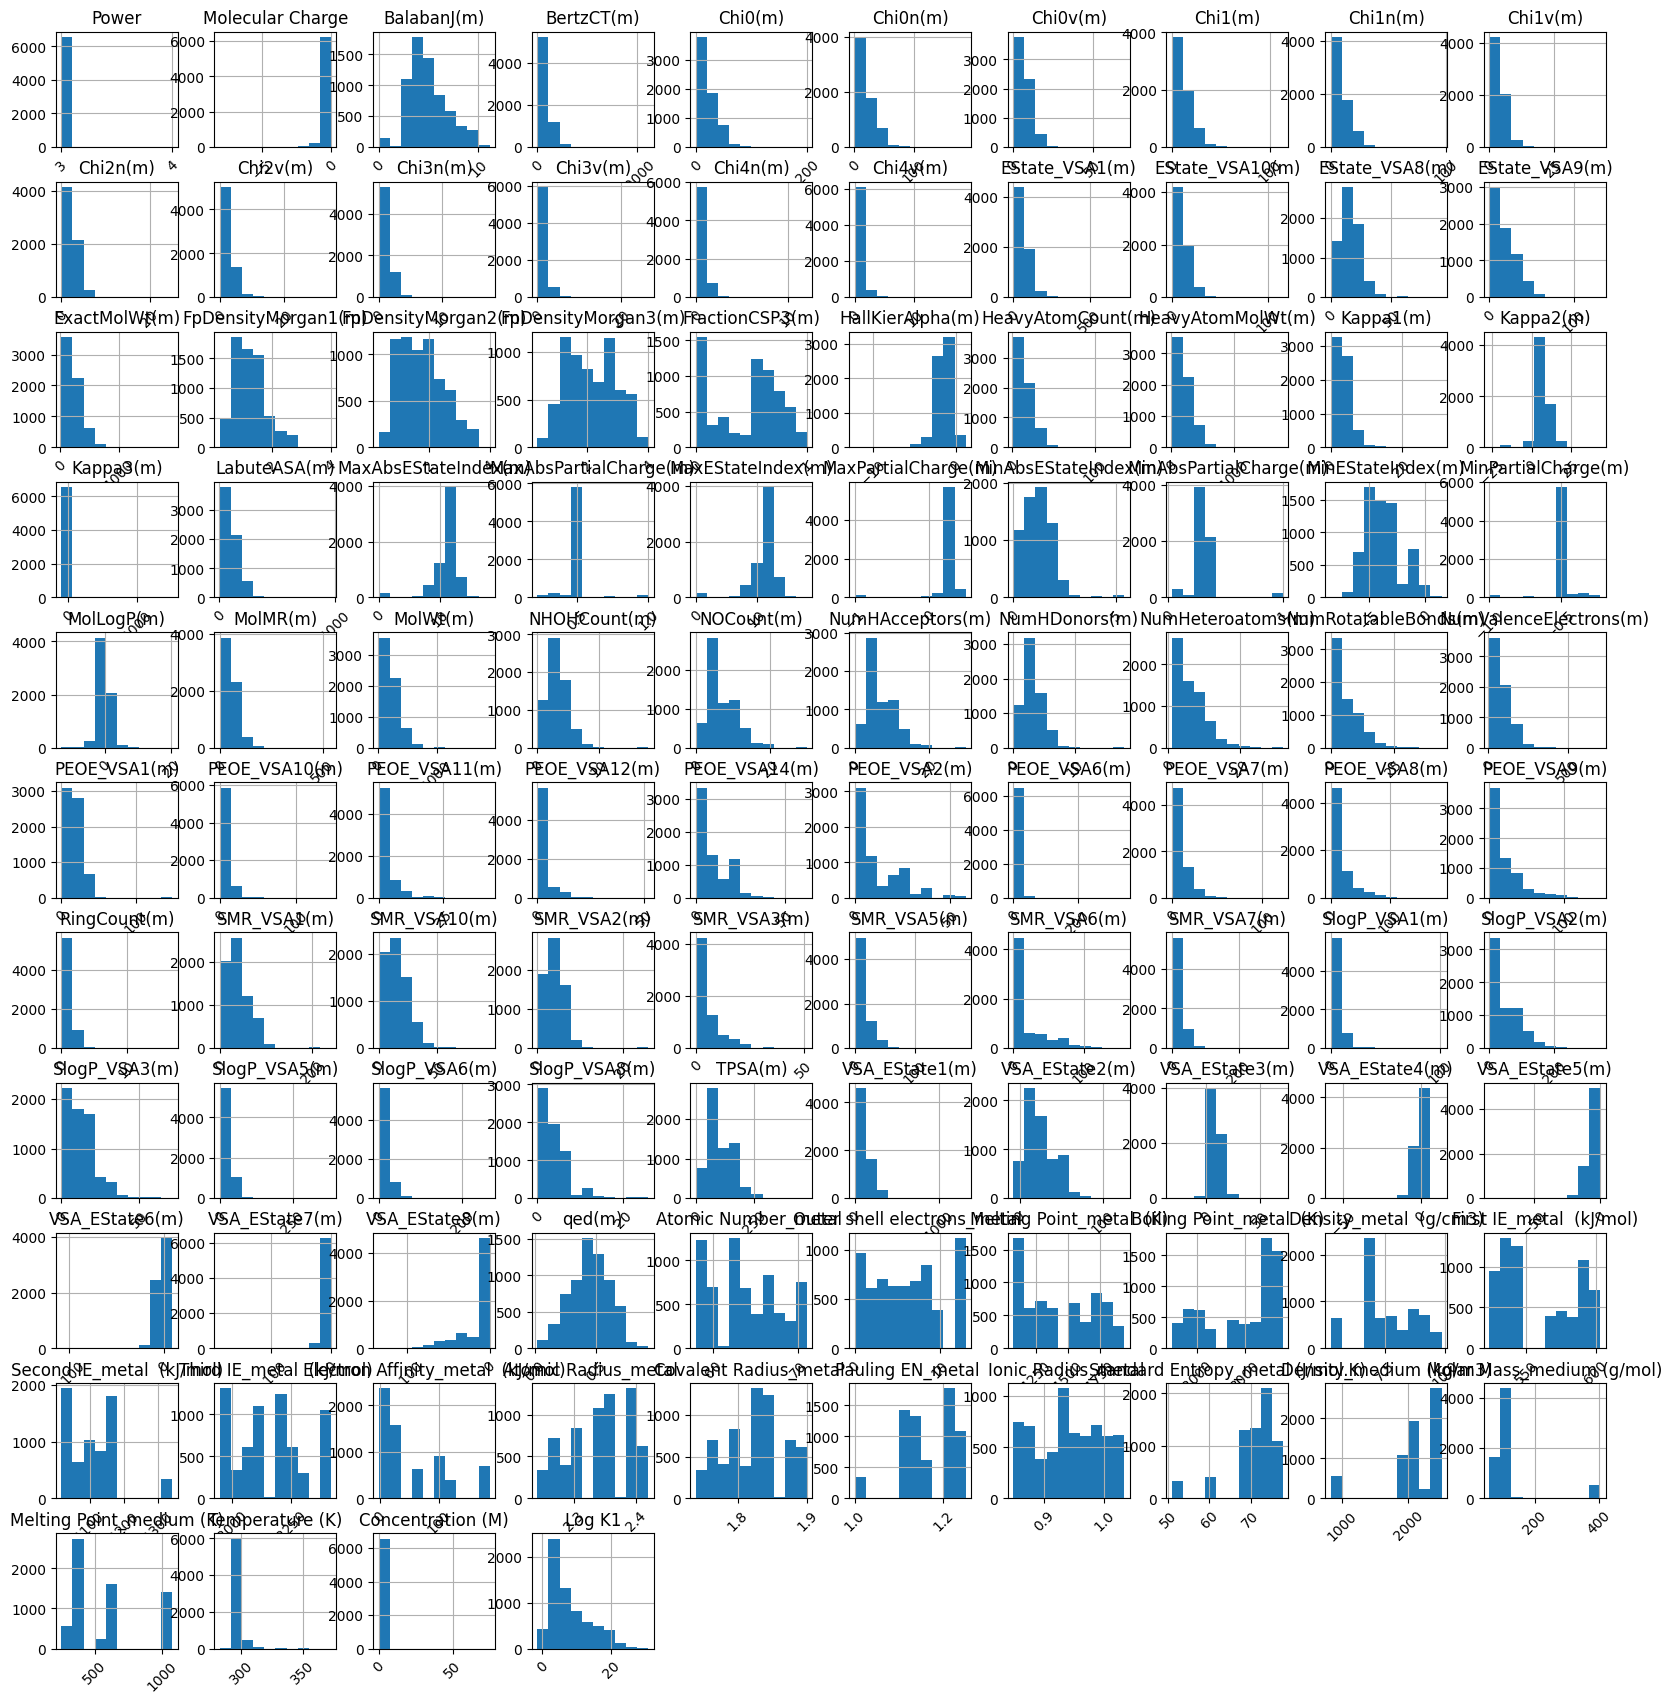

In [23]:
import matplotlib.pyplot as plt
df.hist(figsize=(20,21), xrot=45)
plt.show()

In [24]:
!pip install klib

GridSpec(6, 1)

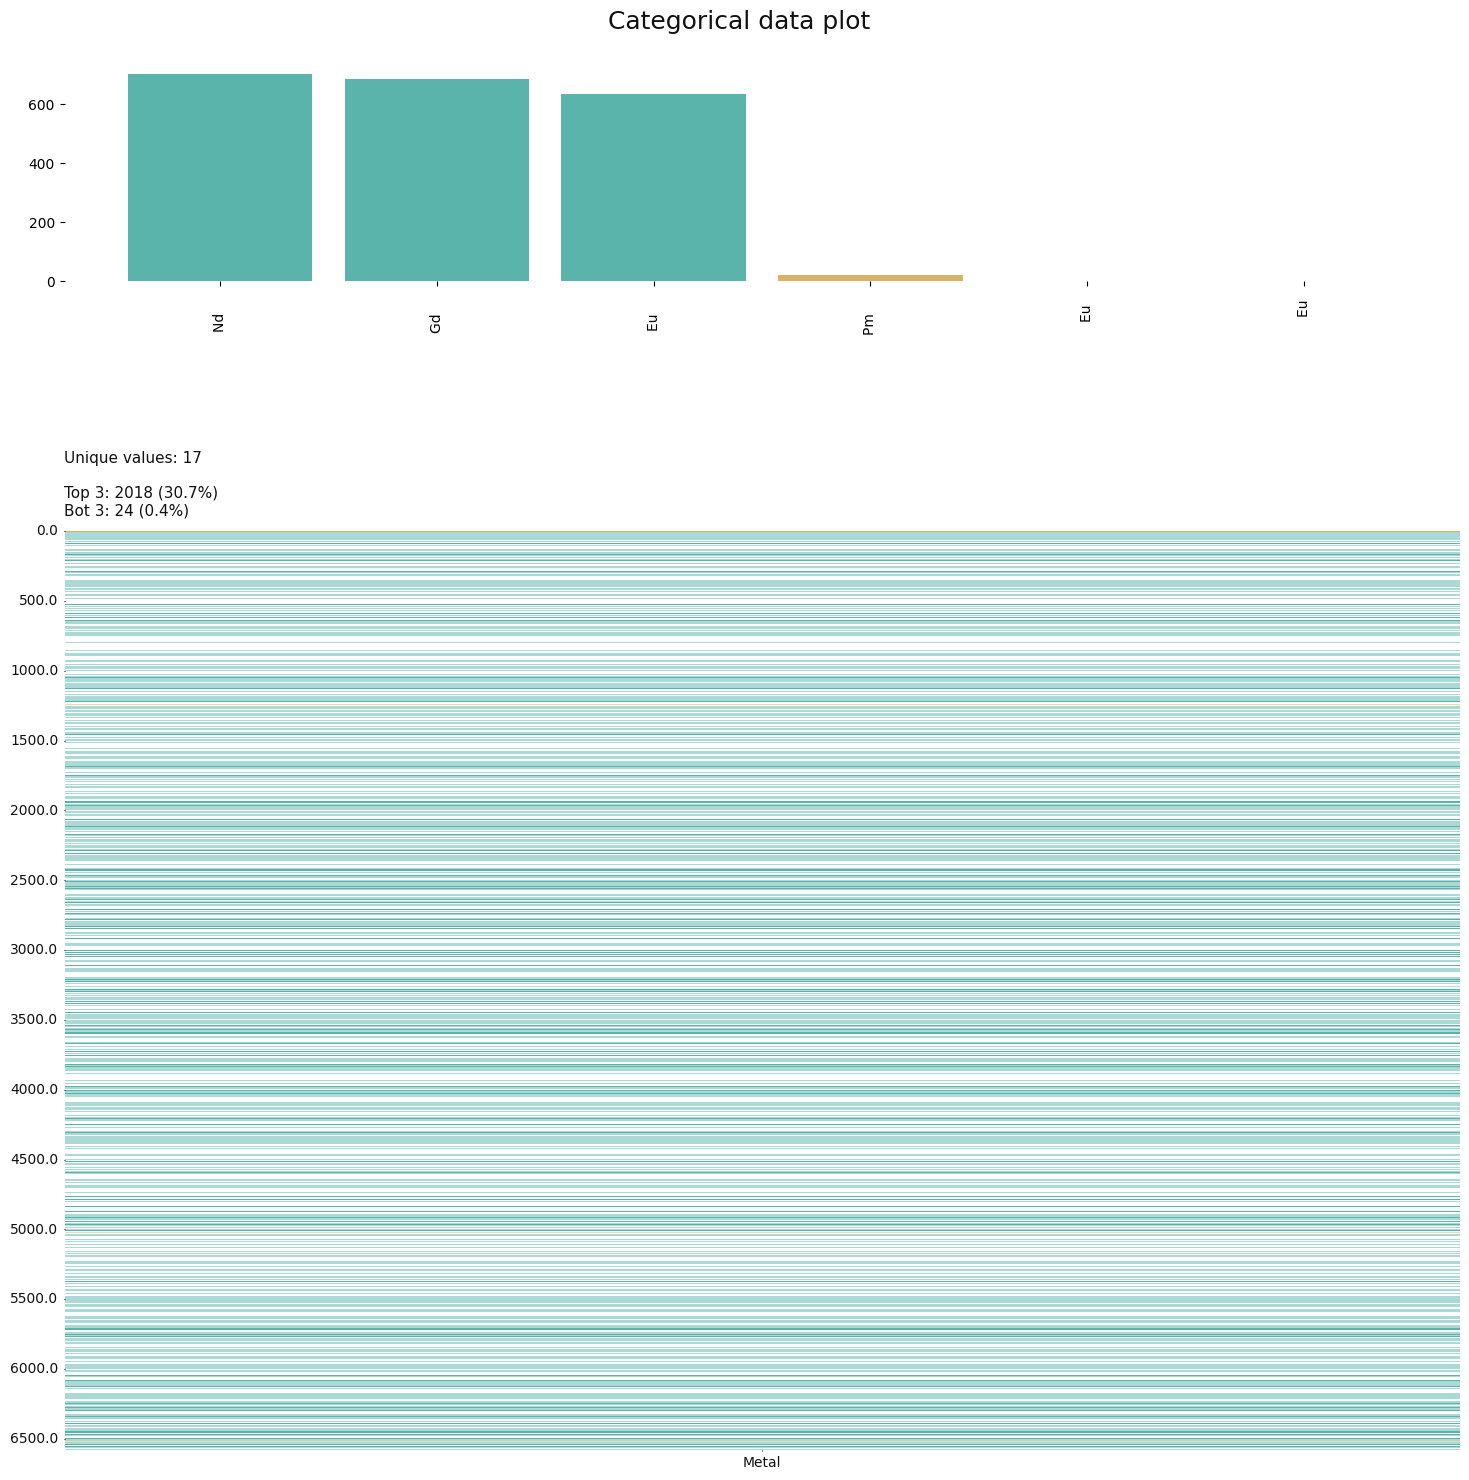

In [25]:
import klib
klib.cat_plot(df)

Note: The number of non binary numerical features is very large (103), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<Axes: xlabel='Molecular Charge', ylabel='Density'>

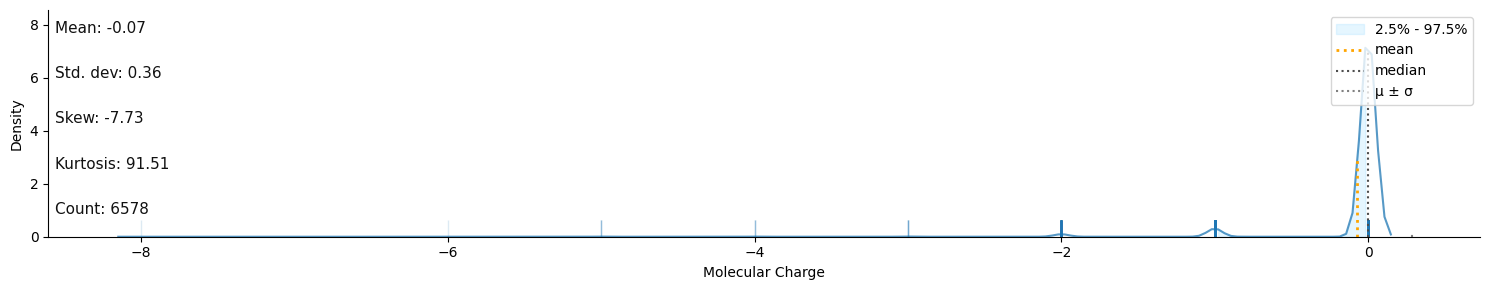

In [26]:
klib.dist_plot(df)

In [27]:
klib.data_cleaning(df)

Shape of cleaned data: (6387, 105) - Remaining NAs: 0


Dropped rows: 191
     of which 191 duplicates. (Rows (first 150 shown): [637, 656, 1308, 1320, 1325, 1327, 1329, 1331, 1333, 1335, 1337, 1341, 1343, 1345, 1408, 1410, 1412, 1414, 1417, 1419, 1421, 1423, 1425, 1427, 1429, 1505, 1506, 1507, 1508, 1511, 1512, 1513, 1514, 1516, 1517, 1518, 1519, 1521, 1522, 1523, 1630, 1675, 1920, 2057, 2351, 2634, 2659, 2661, 2663, 2710, 2769, 2771, 2776, 2779, 2780, 2782, 2785, 2786, 2788, 2791, 2793, 2894, 2895, 2917, 2923, 2928, 2951, 3001, 3104, 3106, 3107, 3111, 3113, 3114, 3116, 3117, 3119, 3120, 3122, 3123, 3125, 3127, 3163, 3165, 3167, 3169, 3178, 3210, 3212, 3214, 3216, 3220, 3222, 3224, 3228, 3230, 3232, 3239, 3253, 3258, 3267, 3269, 3274, 3276, 3362, 3367, 3371, 3376, 3380, 3386, 3534, 3537, 3541, 3544, 3546, 3548, 3552, 3554, 3557, 3581, 3591, 3592, 3599, 3606, 3610, 3611, 3821, 3825, 3907, 3909, 3912, 3915, 3917, 3919, 3947, 3951, 4150, 4155, 4158, 4159, 4163, 4250, 4479, 4483, 4486, 44

,metal,power,molecular_charge,balaban_j_m,bertz_ct_m,chi0_m,chi0n_m,chi0v_m,chi1_m,chi1n_m,...,covalent_radius_metal,pauling_en_metal,ionic_radius_metal,standard_entropy_metal_j_mol_k,density_medium_kg_m3,molar_mass_medium_g_mol,melting_point_medium_k,temperature_k,concentration_m,log_k1
0,Ce,3,-1,0.000000,0.00000,0.00000,0.377964,1.963961,0.000000,0.000000,...,1.84,1.12,1.034,72.000000,2499,122.400002,403,298,1.0,-0.20
1,Eu,3,-1,0.000000,0.00000,0.00000,0.377964,1.963961,0.000000,0.000000,...,1.83,1.20,0.950,77.800003,2499,122.400002,403,298,1.0,-0.20
2,Eu,3,-1,0.000000,0.00000,0.00000,0.377964,1.963961,0.000000,0.000000,...,1.83,1.20,0.950,77.800003,2499,122.400002,403,298,1.0,0.21
3,Eu,3,-1,2.323790,8.00000,3.57735,1.602709,3.188706,1.732051,0.462910,...,1.83,1.20,0.950,77.800003,2499,122.400002,403,293,0.1,0.62
4,Eu,3,-1,2.323790,8.00000,3.57735,1.602709,3.188706,1.732051,0.462910,...,1.83,1.20,0.950,77.800003,2499,122.400002,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Pm,3,-2,4.062943,86.81636,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.86,1.13,0.979,71.599998,2499,122.400002,403,328,2.0,1.60
6383,Ce,3,-2,4.062943,86.81636,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.84,1.12,1.034,72.000000,2165,58.400002,1074,298,1.0,1.57
6384,Eu,3,-2,4.062943,86.81636,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.83,1.20,0.950,77.800003,2165,58.400002,1074,298,1.0,1.53
6385,Tb,3,-2,4.062943,86.81636,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.81,1.10,0.923,73.300003,2165,58.400002,1074,298,1.0,1.38


In [28]:
klib.clean_column_names(df)

,metal,power,molecular_charge,balaban_j_m,bertz_ct_m,chi0_m,chi0n_m,chi0v_m,chi1_m,chi1n_m,...,covalent_radius_metal,pauling_en_metal,ionic_radius_metal,standard_entropy_metal_j_mol_k,density_medium_kg_m3,molar_mass_medium_g_mol,melting_point_medium_k,temperature_k,concentration_m,log_k1
0,Ce,3,-1,0.000000,0.000000,0.00000,0.377964,1.963961,0.000000,0.000000,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.20
1,Eu,3,-1,0.000000,0.000000,0.00000,0.377964,1.963961,0.000000,0.000000,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.20
2,Eu,3,-1,0.000000,0.000000,0.00000,0.377964,1.963961,0.000000,0.000000,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.21
3,Eu,3,-1,2.323790,8.000000,3.57735,1.602709,3.188706,1.732051,0.462910,...,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1,0.62
4,Eu,3,-1,2.323790,8.000000,3.57735,1.602709,3.188706,1.732051,0.462910,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,Pm,3,-2,4.062942,86.816358,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.86,1.13,0.979,71.6,2499,122.4,403,328,2.0,1.60
6579,Ce,3,-2,4.062942,86.816358,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.84,1.12,1.034,72.0,2165,58.4,1074,298,1.0,1.57
6580,Eu,3,-2,4.062942,86.816358,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.83,1.20,0.950,77.8,2165,58.4,1074,298,1.0,1.53
6581,Tb,3,-2,4.062942,86.816358,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.81,1.10,0.923,73.3,2165,58.4,1074,298,1.0,1.38


In [29]:
df_train=klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6578 entries, 0 to 6582
Columns: 105 entries, Metal to Log K1
dtypes: category(1), float32(86), int16(7), int8(11)
memory usage: 2.6 MB


In [30]:
klib.mv_col_handling(df_train)

,Metal,Power,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),Chi1(m),Chi1n(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Ce,3,-1,0.000000,0.00000,0.00000,0.377964,1.963961,0.000000,0.000000,...,1.84,1.12,1.034,72.000000,2499,122.400002,403,298,1.0,-0.20
1,Eu,3,-1,0.000000,0.00000,0.00000,0.377964,1.963961,0.000000,0.000000,...,1.83,1.20,0.950,77.800003,2499,122.400002,403,298,1.0,-0.20
2,Eu,3,-1,0.000000,0.00000,0.00000,0.377964,1.963961,0.000000,0.000000,...,1.83,1.20,0.950,77.800003,2499,122.400002,403,298,1.0,0.21
3,Eu,3,-1,2.323790,8.00000,3.57735,1.602709,3.188706,1.732051,0.462910,...,1.83,1.20,0.950,77.800003,2499,122.400002,403,293,0.1,0.62
4,Eu,3,-1,2.323790,8.00000,3.57735,1.602709,3.188706,1.732051,0.462910,...,1.83,1.20,0.950,77.800003,2499,122.400002,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,Pm,3,-2,4.062943,86.81636,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.86,1.13,0.979,71.599998,2499,122.400002,403,328,2.0,1.60
6579,Ce,3,-2,4.062943,86.81636,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.84,1.12,1.034,72.000000,2165,58.400002,1074,298,1.0,1.57
6580,Eu,3,-2,4.062943,86.81636,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.83,1.20,0.950,77.800003,2165,58.400002,1074,298,1.0,1.53
6581,Tb,3,-2,4.062943,86.81636,4.50000,2.041241,2.857738,2.000000,0.666667,...,1.81,1.10,0.923,73.300003,2165,58.400002,1074,298,1.0,1.38


In [31]:
df.rename(columns = {'Metal':'metal'}, inplace = True)

In [32]:
#correlation
# Using pandas
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-32-1cc9ce8e829d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()
<ipython-input-32-1cc9ce8e829d>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


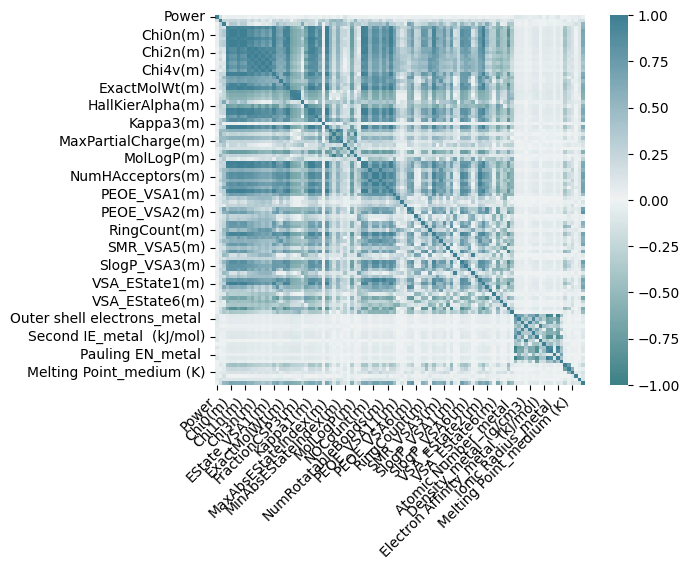

In [33]:
# Using seaborn
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(200, 220, n=800),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<b>Preprocessing Task before Model Building</b>

In [34]:
#1) Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df["metal"])

In [36]:
label

array([ 1,  4,  5, ...,  6, 14, 16])

In [37]:
#label encoding
df['metal']=df['metal'].replace("Ce","0")

In [38]:
df['metal']=df['metal'].replace("Tb","2")

In [39]:

df['metal']=df['metal'].replace("Dy","3")

In [40]:

df['metal']=df['metal'].replace("Er","4")

In [41]:
df['metal']=df['metal'].replace("Gd","5")

In [42]:
df['metal']=df['metal'].replace("Ho","6")

In [43]:
df['metal']=df['metal'].replace("Lu","7")

In [44]:
df['metal']=df['metal'].replace("Nd","8")

In [45]:

df['metal']=df['metal'].replace("Pr","9")


In [46]:

df['metal']=df['metal'].replace("Sm","10")

In [47]:
df['metal']=df['metal'].replace("Tm","11")

In [48]:

df['metal']=df['metal'].replace("Yb","12")

In [49]:
df['metal']=df['metal'].replace("Ce","13")

In [50]:

df['metal']=df['metal'].replace("Pm","14")


In [51]:
df['metal']=label

In [52]:
df["metal"].unique()

array([ 1,  4,  5,  6, 14,  2,  3,  7,  8,  9, 10, 12, 13, 15, 16,  0, 11])

<b> Splitting our data into train and test</b>

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:103]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

In [54]:
X.head()

,metal,Power,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),Chi1(m),Chi1n(m),...,Electron Affinity_metal (kJ/mol),Atomic Radius_metal,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K)
0,1,3,-1,0.00000,0.0,0.00000,0.377964,1.963961,0.000000,0.00000,...,55.0,2.42,1.84,1.12,1.034,72.0,2499,122.4,403,298
1,4,3,-1,0.00000,0.0,0.00000,0.377964,1.963961,0.000000,0.00000,...,11.2,2.35,1.83,1.20,0.950,77.8,2499,122.4,403,298
2,5,3,-1,0.00000,0.0,0.00000,0.377964,1.963961,0.000000,0.00000,...,11.2,2.35,1.83,1.20,0.950,77.8,2499,122.4,403,298
3,5,3,-1,2.32379,8.0,3.57735,1.602709,3.188706,1.732051,0.46291,...,11.2,2.35,1.83,1.20,0.950,77.8,2499,122.4,403,293
4,6,3,-1,2.32379,8.0,3.57735,1.602709,3.188706,1.732051,0.46291,...,11.2,2.35,1.83,1.20,0.950,77.8,2499,122.4,403,298


In [55]:
y.head()

0   -0.20
1   -0.20
2    0.21
3    0.62
4    0.03
Name: Log K1, dtype: float64

In [56]:
def scale_data(df,col):
  from numpy import asarray
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
y_test

3072     2.62
1975    12.12
3581     5.72
4687     8.90
604     18.15
        ...  
5598    10.76
1534    15.35
759     10.10
4441     3.01
4037     3.93
Name: Log K1, Length: 1316, dtype: float64

In [59]:
X_train.shape

(5262, 103)

In [60]:
y_train.shape

(5262,)

<b>Standardization</b>

In [61]:


X.describe()

,metal,Power,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),Chi1(m),Chi1n(m),...,Electron Affinity_metal (kJ/mol),Atomic Radius_metal,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K)
count,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,...,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000
mean,8.612648,3.004561,-0.071754,4.924970,726.201185,23.074497,20.283301,7.472869,12.680317,9.728329,...,56.471846,2.339991,1.823892,1.161818,0.942010,70.800912,2152.134843,127.151900,585.055336,297.894649
std,4.646923,0.067384,0.357830,1.973571,597.020415,15.253177,14.029496,4.650318,8.264730,6.940875,...,55.323134,0.052140,0.043418,0.060594,0.056884,6.201848,442.918746,83.707449,264.185732,3.943458
min,0.000000,3.000000,-8.000000,0.000000,0.000000,0.000000,0.377964,0.377964,0.000000,0.000000,...,-1.900000,2.240000,1.740000,1.000000,0.848000,51.000000,830.000000,58.400000,253.000000,283.000000
25%,6.000000,3.000000,0.000000,3.565686,306.644115,12.455665,10.449490,4.119172,6.912790,5.001027,...,13.200000,2.300000,1.790000,1.120000,0.894000,69.500000,1984.000000,88.100000,403.000000,298.000000
50%,9.000000,3.000000,0.000000,4.680168,535.528023,18.249818,15.724745,5.909275,10.133463,7.587117,...,32.800000,2.340000,1.820000,1.170000,0.938000,72.000000,2165.000000,122.400000,403.000000,298.000000
75%,13.000000,3.000000,0.000000,6.159538,1007.780662,32.576986,29.041241,10.160414,18.056290,14.214506,...,92.800000,2.390000,1.850000,1.200000,0.995000,74.000000,2499.000000,122.400000,607.000000,298.000000
max,16.000000,4.000000,0.000000,11.123800,11154.722560,199.844876,186.109681,69.687390,113.532865,96.073770,...,184.900000,2.420000,1.900000,1.250000,1.034000,77.800000,2499.000000,404.200000,1074.000000,373.000000


In [62]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [63]:
X_train_std= sc.fit_transform(X_train)

In [64]:
X_test_std= sc.transform(X_test)

In [65]:
X_train_std

array([[-0.57442668, -0.06768974,  0.20027624, ..., -0.50276639,
        -0.01764796,  0.03471117],
       [-0.57442668, -0.06768974,  0.20027624, ..., -0.05720897,
        -0.6883878 ,  1.56529902],
       [ 1.15662533, -0.06768974,  0.20027624, ...,  3.29995895,
        -1.25361801,  0.03471117],
       ...,
       [ 0.29109932, -0.06768974,  0.20027624, ..., -0.05720897,
        -0.6883878 ,  0.03471117],
       [ 0.29109932, -0.06768974,  0.20027624, ..., -0.05720897,
        -0.6883878 , -1.24077871],
       [-1.65633418, -0.06768974,  0.20027624, ..., -0.05720897,
        -0.6883878 ,  1.31020104]])

In [66]:
X_test_std

array([[-0.57442668, -0.06768974,  0.20027624, ..., -0.62666471,
         1.72326107, -3.79175847],
       [ 0.94024383, -0.06768974,  0.20027624, ...,  3.29995895,
        -1.25361801,  0.03471117],
       [-1.65633418, -0.06768974,  0.20027624, ..., -0.05720897,
        -0.6883878 ,  0.03471117],
       ...,
       [ 0.94024383, -0.06768974,  0.20027624, ..., -0.05720897,
        -0.6883878 , -1.24077871],
       [-0.57442668, -0.06768974,  0.20027624, ..., -0.81966017,
         1.84007532,  3.09588687],
       [-1.43995268, -0.06768974,  0.20027624, ..., -0.31096226,
         0.08032528,  0.03471117]])

In [67]:
y_train

2950     4.10
3709     1.79
1091    13.14
4916     3.42
6515    15.00
        ...  
5023    11.00
3303     2.44
5851     2.18
944     17.60
3637     3.78
Name: Log K1, Length: 5262, dtype: float64

In [68]:
y_test

3072     2.62
1975    12.12
3581     5.72
4687     8.90
604     18.15
        ...  
5598    10.76
1534    15.35
759     10.10
4441     3.01
4037     3.93
Name: Log K1, Length: 1316, dtype: float64

# <b>Modelling</b>

In [69]:

import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE
def rmse(X,y):
    return math.sqrt(((X-y)**2).mean())

# Function for calculating all the relevant metrics
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),rmse(m.predict(X_test), y_test),
           m.score(X_train, y_train),m.score(X_test, y_test),
           median_absolute_error(m.predict(X_train), y_train),median_absolute_error(m.predict(X_test), y_test),
           metrics.mean_absolute_error(m.predict(X_train), y_train),metrics.mean_absolute_error(m.predict(X_test), y_test),

          ]


    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')

In [70]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):

    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df],
                                      axis=0, ignore_index=True)

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

RMSE-Train: 2.4267963607488356
RMSE-Test: 2.442281402502116
Score-Train: 0.8281997824569114
Score-Test: 0.8155522582767996
MedAE-Train: 1.3946779651654833
MedAE-Test: 1.3746478765144179
MeanAE-Train: 1.7885343846351627
MeanAE-Test: 1.7908129424714978 



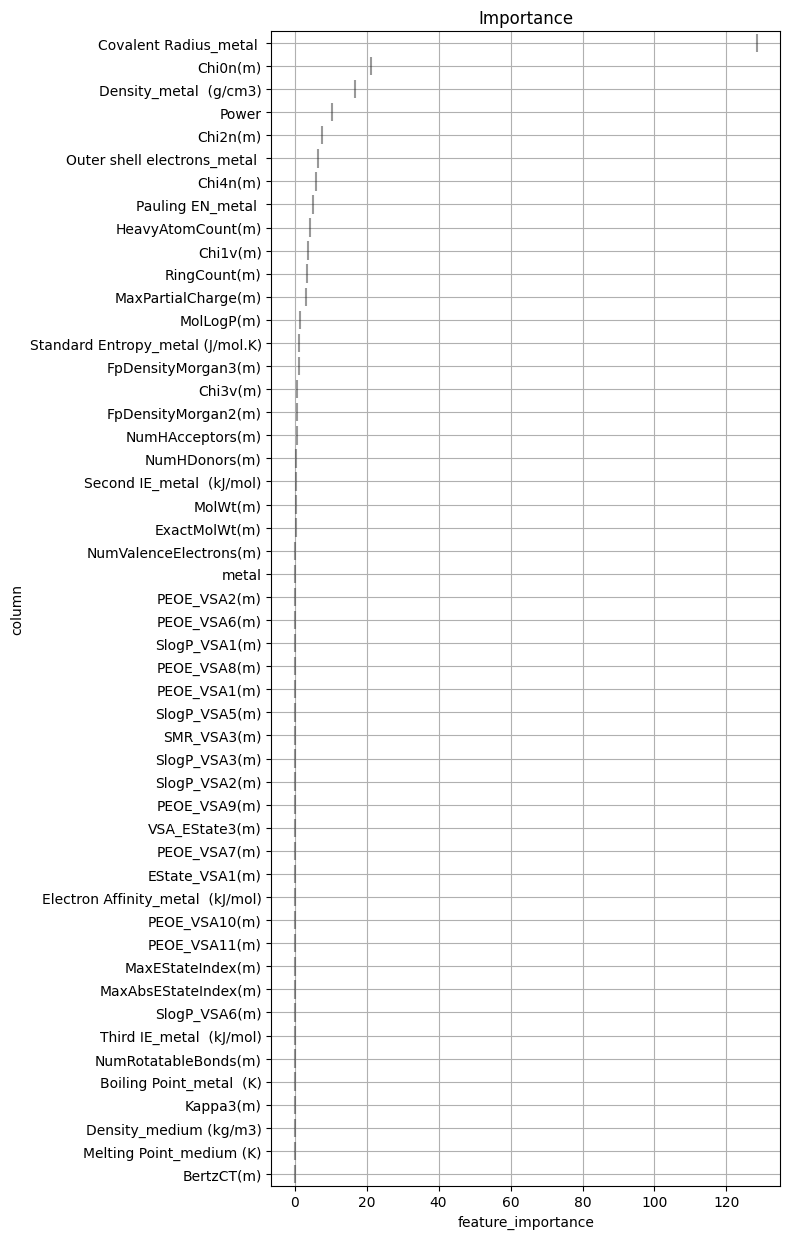

In [71]:
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression()

# Fit the model to the data
lModel.fit(X_train,y_train)

# print score of the model
print_score(lModel)

# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_, X_train)

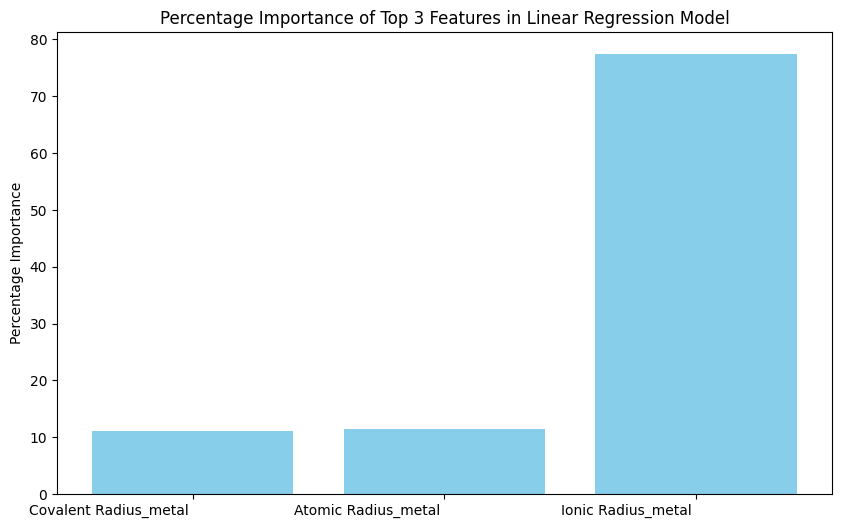

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_top_percentage_importance(coefs, feature_names, top_n=3):
    # Get the indices of the top n coefficients
    top_indices = np.argsort(np.abs(coefs))[-top_n:]

    # Get the top n coefficients and corresponding feature names
    top_coefs = coefs[top_indices]
    top_features = feature_names[top_indices]

    # Calculate the percentage importance for each feature
    total_importance = np.sum(np.abs(top_coefs))
    percentage_importance = np.abs(top_coefs) / total_importance * 100

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(top_features, percentage_importance, color='skyblue')
    ax.set_ylabel('Percentage Importance')
    ax.set_title('Percentage Importance of Top {} Features in Linear Regression Model'.format(top_n))
    plt.xticks(ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Assuming X_train contains your feature data and lModel is your trained Linear Regression model
visualize_top_percentage_importance(lModel.coef_, X_train.columns, top_n=3)


In [73]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [ ]:
rf.fit(X_train_std,y_train)

In [ ]:
y_pred_rf= rf.predict(X_test_std)

In [ ]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

In [ ]:
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor()

# print score of the model
knnr.fit(X_train.iloc[1:10000], y_train.iloc[1:10000])

# print score of the model
print_score(knnr)

In [ ]:
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()

GBR.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_, X_train.iloc[1:50000])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train contains your feature data and GBR is your trained Gradient Boosting Regressor model
# Also assuming you have the print_score and visualize_importance functions available

# Fit a Gradient Boosting Regressor model to the train dataset
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()
GBR.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(GBR)

# Visualize only the top 3 important features
def visualize_top_features_importance(importances, feature_names, top_n=3):
    # Get the indices of the top n importances
    top_indices = np.argsort(importances)[-top_n:]

    # Get the top n importances and corresponding feature names
    top_importances = importances[top_indices]
    top_features = feature_names[top_indices]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(top_features, top_importances, color='skyblue')
    ax.set_ylabel('Feature Importance')
    ax.set_title('Top {} Important Features in Gradient Boosting Regressor Model'.format(top_n))
    plt.xticks(ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Assuming X_train contains your feature data and GBR is your trained Gradient Boosting Regressor model
visualize_top_features_importance(GBR.feature_importances_, X_train.columns, top_n=3)


In [ ]:
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()

# Instantiate the model
DTR.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(DTR.feature_importances_, X_train.iloc[1:50000])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train contains your feature data and DTR is your trained Decision Tree Regressor model
# Also assuming you have the print_score and visualize_importance functions available

# Fit a Decision Tree Regressor model to the train dataset
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()
DTR.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(DTR)

# Visualize only the top 3 important features
def visualize_top_features_importance(importances, feature_names, top_n=3):
    # Get the indices of the top n importances
    top_indices = np.argsort(importances)[-top_n:]

    # Get the top n importances and corresponding feature names
    top_importances = importances[top_indices]
    top_features = feature_names[top_indices]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(top_features, top_importances, color='skyblue')
    ax.set_ylabel('Feature Importance')
    ax.set_title('Top {} Important Features in Decision Tree Regressor Model'.format(top_n))
    plt.xticks(ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Assuming X_train contains your feature data and DTR is your trained Decision Tree Regressor model
visualize_top_features_importance(DTR.feature_importances_, X_train.columns, top_n=3)


In [ ]:
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor()

# Instantiate the model
AdaBoost.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(AdaBoost)

# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_, X_train.iloc[1:50000])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train contains your feature data and AdaBoost is your trained AdaBoost Regressor model
# Also assuming you have the print_score and visualize_importance functions available

# Fit an AdaBoost Regressor model to the train dataset
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor()
AdaBoost.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(AdaBoost)

# Visualize only the top 3 important features
def visualize_top_features_importance(importances, feature_names, top_n=3):
    # Get the indices of the top n importances
    top_indices = np.argsort(importances)[-top_n:]

    # Get the top n importances and corresponding feature names
    top_importances = importances[top_indices]
    top_features = feature_names[top_indices]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(top_features, top_importances, color='skyblue')
    ax.set_ylabel('Feature Importance')
    ax.set_title('Top {} Important Features in AdaBoost Regressor Model'.format(top_n))
    plt.xticks(ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Assuming X_train contains your feature data and AdaBoost is your trained AdaBoost Regressor model
visualize_top_features_importance(AdaBoost.feature_importances_, X_train.columns, top_n=3)


In [ ]:
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()

# Fit the model to the data
xgbr.fit(X_train.iloc[1:50000],y_train.iloc[1:50000])

# print score of the model
print_score(xgbr)

# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_, X_train.iloc[1:50000])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train contains your feature data and xgbr is your trained XGB Regressor model
# Also assuming you have the print_score and visualize_importance functions available

# Fit an XGB Regressor model to the train dataset
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()
xgbr.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(xgbr)

# Visualize only the top 3 important features
def visualize_top_features_importance(importances, feature_names, top_n=3):
    # Get the indices of the top n importances
    top_indices = np.argsort(importances)[-top_n:]

    # Get the top n importances and corresponding feature names
    top_importances = importances[top_indices]
    top_features = feature_names[top_indices]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(top_features, top_importances, color='skyblue')
    ax.set_ylabel('Feature Importance')
    ax.set_title('Top {} Important Features in XGB Regressor Model'.format(top_n))
    plt.xticks(ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Assuming X_train contains your feature data and xgbr is your trained XGB Regressor model
visualize_top_features_importance(xgbr.feature_importances_, X_train.columns, top_n=3)


In [ ]:
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm
import lightgbm as lgbm

# Instantiate the model
lg = lgbm.LGBMRegressor()

# Fit the model to the data
lg.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(lg)

# visualizing the inportance of features.
fig, ax = visualize_importance(lg.feature_importances_, X_train.iloc[1:50000])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train contains your feature data and lg is your trained LightGBM Regressor model
# Also assuming you have the print_score and visualize_importance functions available

# Fit a LightGBM Regressor model to the train dataset
import lightgbm as lgbm

# Instantiate the model
lg = lgbm.LGBMRegressor()
lg.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(lg)

# Visualize only the top 3 important features
def visualize_top_features_importance(importances, feature_names, top_n=3):
    # Get the indices of the top n importances
    top_indices = np.argsort(importances)[-top_n:]

    # Get the top n importances and corresponding feature names
    top_importances = importances[top_indices]
    top_features = feature_names[top_indices]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(top_features, top_importances, color='skyblue')
    ax.set_ylabel('Feature Importance')
    ax.set_title('Top {} Important Features in LightGBM Regressor Model'.format(top_n))
    plt.xticks(ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Assuming X_train contains your feature data and lg is your trained LightGBM Regressor model
visualize_top_features_importance(lg.feature_importances_, X_train.columns, top_n=3)


<b>Comparing all the models based on their metric </b>

In [ ]:
def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split


    # now, create a list with the objects
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [ ]:
import warnings
warnings.filterwarnings('ignore')
models= [lModel, DTR, rf, knnr, GBR, xgbr, AdaBoost]
names = ['Lr', 'Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,y_train,X_test,y_test)

<b>RMSE of all model on train and test data</b>

In [ ]:
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

<b>All metrics on train and test data</b>

In [ ]:
print("Results on Test data")
comp_model_test

<b>Hyper Parameter Tuning</b>

<b>grid search</b>

In [ ]:
##hyper parameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

In [ ]:
grid_search_forest.best_params_

In [ ]:
grid_search_forest.best_score_

In [ ]:
y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [ ]:
r2_score(y_test,y_pred_rf_grid)

# DL part

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [ ]:
class RegressionDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

In [ ]:
train_dataset = RegressionDataset(torch.tensor(X_train_std, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
test_dataset = RegressionDataset(torch.tensor(X_test_std, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [ ]:
# RMSE Calculation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Custom Model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [ ]:
input_size = X_train.shape[1]
model = RegressionModel(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training Loop
num_epoch = 500
for epoch in range(num_epoch):  # number of epochs
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        y_pred = []
        y_true = []
        for inputs, targets in test_loader:
            outputs = model(inputs)
            y_pred.extend(outputs.numpy())
            y_true.extend(targets.numpy())

        y_pred = np.array(y_pred).flatten()
        print(f'Epoch {epoch+1}, RMSE: {rmse(y_true, y_pred)}')

In [ ]:
y_pred = np.array(y_pred).flatten()
print(f'Test RMSE: {rmse(y_true, y_pred)}')

In [ ]:
import sklearn.metrics as metrics
metrics.median_absolute_error(y_pred, y_true)

In [ ]:
metrics.mean_absolute_error(y_pred, y_true)

In [ ]:
metrics.r2_score(y_pred, y_true)